# Optimization Techniques on MNIST Dataset
This notebook explores various optimization techniques for training neural networks on the MNIST dataset. The focus will be on different optimization strategies including Adaptive Learning Rates, SGD, Mini-Batch Gradient Descent, and Learning Rate Adjustments. Each section will provide a practical task related to these techniques.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train.shape , y_train.shape

((60000, 28, 28), (60000, 10))

In [4]:
x_test.shape , y_test.shape

((10000, 28, 28), (10000, 10))

In [19]:
x_train = x_train.reshape(-1,28*28)
x_train.shape

(60000, 784)

In [20]:
x_test = x_test.reshape(-1,28*28)
x_test.shape

(10000, 784)

## Adaptive Learning Rates

## Implementing a Simple Neural Network from Scratch

### Building the Network
Define the architecture of a simple feedforward neural network with one hidden layer. You will need to manually initialize the weights and biases.

**TODO:** Initialize Parameters
Objective: Create a function to initialize weights and biases for all layers of the network.
Instructions:
- Initialize weights with small random values and biases with zeros.
- Use numpy for creating arrays and operations.

Hint: Use np.random.randn for weights and np.zeros for biases. Scale weights by 0.1.

In [5]:
def initialize_parameters(input_size, hidden_size, output_size):
    """
    Initialize weights and biases for a simple feedforward neural network.

    Parameters:
    - input_size: Number of input features.
    - hidden_size: Number of neurons in the hidden layer.
    - output_size: Number of output classes.

    Returns:
    - parameters: A dictionary containing weights and biases.
    """
    parameters = {
        'W1': np.random.randn(input_size, hidden_size) * 0.1,
        'b1': np.zeros((1, hidden_size)),
        'W2': np.random.randn(hidden_size, output_size) * 0.1,
        'b2': np.zeros((1, output_size))
    }
    return parameters



TODO: Define Activation Functions
Objective: Implement commonly used activation functions.
Instructions:
 - Define the ReLU and Sigmoid activation functions.
 - Ensure each function works with numpy arrays and supports both forward and derivative (gradient) computations.


In [6]:
def relu(x):
    """
    ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying ReLU.
    """
    return np.maximum(0, x)

def relu_derivative(x):
    """
    Derivative of ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of ReLU.
    """
    # return np.where(x > 0, 1, 0)
    return (x > 0).astype(float)

def sigmoid(x):
    """
    Sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying sigmoid.
    """
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """
    Derivative of sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of sigmoid.
    """
    return sigmoid(x) * (1 - sigmoid(x))


TODO: Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.

In [7]:
def forward_propagation(X, parameters):
    """
    Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.
    """
    W1, b1 = parameters['W1'], parameters['b1']
    W2, b2 = parameters['W2'], parameters['b2']

    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    cache = {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2}
    return A2, cache


TODO: Implement the loss function. Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.

In [8]:
def compute_loss(y_true, y_pred):
    """
    Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.
    """
    m = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-9)) / m # + 1e-9 is for numerical stability (division by zero)
    return loss

TODO: Implement backpropagation for the network and Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.

In [11]:
def backward_propagation(X, y_true, parameters, cache):
    """
    Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.
    """
    m = X.shape[0]

    W1, W2 = parameters['W1'], parameters['W2']
    A1, A2 = cache['A1'], cache['A2']

    dZ2 = A2 - y_true
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(cache['Z1'])
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    gradients = {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2}

    return gradients


TODO: Update the parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.

In [12]:
def update_parameters(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    parameters['W1'] -= learning_rate * gradients['dW1']
    parameters['b1'] -= learning_rate * gradients['db1']

    parameters['W2'] -= learning_rate * gradients['dW2']
    parameters['b2'] -= learning_rate * gradients['db2']

    return parameters


TODO: Train the model by changing the hidden layer size (such as [32, 64, 128]) and observe the impact on network performance during training.

    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

In [21]:
# Training Loop
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """

    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, A2)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters = update_parameters(parameters, gradients, learning_rate)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{epochs} - Loss: {loss:.4f}")

print("Training with hidden layer size: 32")
train_model(x_train, y_train, hidden_size=32)
print()

print("Training with hidden layer size: 64")
train_model(x_train, y_train, hidden_size=64)
print()

print("Training with hidden layer size: 128")
train_model(x_train, y_train, hidden_size=128)
print()

Training with hidden layer size: 32
Epoch 0/50 - Loss: 0.6729
Epoch 10/50 - Loss: 1.1663
Epoch 20/50 - Loss: 1.7372
Epoch 30/50 - Loss: 1.9724
Epoch 40/50 - Loss: 2.0294

Training with hidden layer size: 64
Epoch 0/50 - Loss: 0.7646
Epoch 10/50 - Loss: 1.6157
Epoch 20/50 - Loss: 1.9322
Epoch 30/50 - Loss: 1.9663
Epoch 40/50 - Loss: 1.9147

Training with hidden layer size: 128
Epoch 0/50 - Loss: 1.1033
Epoch 10/50 - Loss: 1.9478
Epoch 20/50 - Loss: 1.9598
Epoch 30/50 - Loss: 1.8563
Epoch 40/50 - Loss: 1.7458



TODO: Implement Adam Optimizer

1. Initialize Parameters: Create variables to store the moment estimates (first and second) for each parameter.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).

2. Update Rules: Implement the update rules based on the gradients, learning rate, and moment estimates.


In [22]:
def initialize_adam(parameters):
    """
    Initialize the Adam optimizer variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).
    """
    v = {key: np.zeros_like(value) for key, value in parameters.items()}
    s = {key: np.zeros_like(value) for key, value in parameters.items()}
    t = 0
    return v, s, t


def update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Update parameters using the Adam optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: First moment vector.
    - s: Second moment vector.
    - t: Time step.
    - learning_rate: Learning rate for updates.
    - beta1: Exponential decay rate for the first moment estimates.
    - beta2: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated first moment vector.
    - s: Updated second moment vector.
    - t: Updated time step.
    """
    t += 1
    for key in parameters:
        v[key] = beta1 * v[key] + (1 - beta1) * gradients['d' + key]
        s[key] = beta2 * s[key] + (1 - beta2) * (gradients['d' + key] ** 2)

        # correct bias
        v_corrected = v[key] / (1 - beta1 ** t)
        s_corrected = s[key] / (1 - beta2 ** t)

        parameters[key] -= learning_rate * v_corrected / (np.sqrt(s_corrected) + epsilon)

    return parameters, v, s, t


TODO: Implement Adam optimizer into the training loop.

In [23]:
def train_model_with_adam(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001):
    """
    Train the neural network model using Adam optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    v, s, t = initialize_adam(parameters)

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, A2)
        gradients = backward_propagation(X_train, y_train, parameters, cache)

        parameters, v, s, t = update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{epochs} - Loss: {loss:.4f}")


print("Training with hidden layer size: 32")
train_model_with_adam(x_train, y_train, hidden_size=32)
print()

print("Training with hidden layer size: 64")
train_model_with_adam(x_train, y_train, hidden_size=64)
print()

print("Training with hidden layer size: 128")
train_model_with_adam(x_train, y_train, hidden_size=128)
print()

Training with hidden layer size: 32
Epoch 0/50 - Loss: 0.9549
Epoch 10/50 - Loss: 1.5017
Epoch 20/50 - Loss: 1.9853
Epoch 30/50 - Loss: 1.9220
Epoch 40/50 - Loss: 1.6063

Training with hidden layer size: 64
Epoch 0/50 - Loss: 0.5874
Epoch 10/50 - Loss: 1.4508
Epoch 20/50 - Loss: 2.0771
Epoch 30/50 - Loss: 1.6316
Epoch 40/50 - Loss: 1.2262

Training with hidden layer size: 128
Epoch 0/50 - Loss: 0.9189
Epoch 10/50 - Loss: 2.1526
Epoch 20/50 - Loss: 1.2584
Epoch 30/50 - Loss: 0.8840
Epoch 40/50 - Loss: 0.8609



### Compare Adam and RMSprop


TODO: First, implement the RMSprop optimizer. The RMSprop optimizer uses a moving average of squared gradients to normalize the gradient, which helps to stabilize the updates.

In [24]:
def initialize_rmsprop(parameters):
    """
    Initialize the RMSprop variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - s: Second moment vector (initialized to zeros).
    """
    s = {key: np.zeros_like(value) for key, value in parameters.items()}
    return s

def update_parameters_with_rmsprop(parameters, gradients, s, learning_rate=0.001, beta=0.9, epsilon=1e-8):
    """
    Update parameters using the RMSprop optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - s: Second moment vector.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - s: Updated second moment vector.
    """
    for key in parameters:
        s[key] = beta * s[key] + (1 - beta) * (gradients['d' + key] ** 2)
        parameters[key] -= learning_rate * gradients['d' + key] / (np.sqrt(s[key]) + epsilon)

    return parameters, s


TODO: Modify the training loop to allow for both optimizers and store the loss history for comparison.

In [25]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001, optimizer='adam'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('adam' or 'rmsprop').

    Returns:
    - loss_history: List of loss values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    if optimizer == 'adam':
        v, s, t = initialize_adam(parameters)
    elif optimizer == 'rmsprop':
        s = initialize_rmsprop(parameters)
    else:
        raise ValueError("Invalid optimizer. Choose 'adam' or 'rmsprop'.")

    loss_history = []

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, A2)
        gradients = backward_propagation(X_train, y_train, parameters, cache)

        if optimizer == 'adam':
            parameters, v, s, t = update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate)
        elif optimizer == 'rmsprop':
            parameters, s = update_parameters_with_rmsprop(parameters, gradients, s, learning_rate)

        loss_history.append(loss)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{epochs} - Loss: {loss:.4f}")

    return loss_history

TODO:  Compare Both Optimizers. Create a function to train the model using both optimizers and plot the loss histories for comparison.

Training with adam optimizer...
Epoch 0/50 - Loss: 0.7456
Epoch 10/50 - Loss: 1.7261
Epoch 20/50 - Loss: 1.9622
Epoch 30/50 - Loss: 1.2304
Epoch 40/50 - Loss: 1.0514

Training with rmsprop optimizer...
Epoch 0/50 - Loss: 0.9619
Epoch 10/50 - Loss: 1.3104
Epoch 20/50 - Loss: 1.0567
Epoch 30/50 - Loss: 0.8914
Epoch 40/50 - Loss: 0.7870



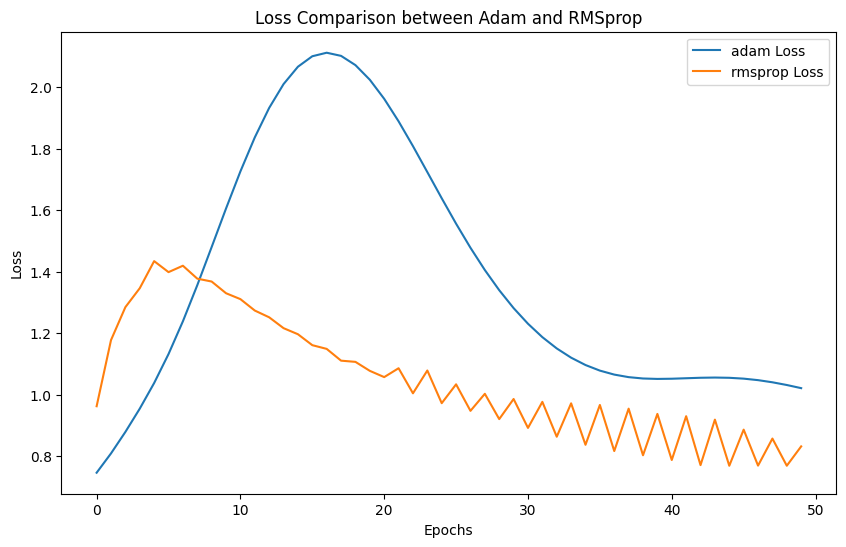

In [30]:
def compare_optimizers(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the Adam and RMSprop optimizers.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """
    plt.figure(figsize=(10, 6))

    optimizers = ['adam', 'rmsprop']
    for optimizer in optimizers:
        print(f"Training with {optimizer} optimizer...")
        loss_history = train_model(X_train, y_train, hidden_size, epochs, optimizer=optimizer)
        plt.plot(loss_history, label=optimizer + " Loss")
        print()

    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss Comparison between Adam and RMSprop')
    plt.show()

# compare_optimizers(x_train, y_train, hidden_size=32, epochs=50)
compare_optimizers(x_train, y_train, hidden_size=64, epochs=50) # you can choose 32 or 128 too
# compare_optimizers(x_train, y_train, hidden_size=128, epochs=50)

## Stochastic Gradient Descent (SGD)

### Impact of Different Learning Rates on SGD


Explore the impact of different learning rates on the training dynamics and performance of Stochastic Gradient Descent (SGD). This will allow us to observe how the learning rate affects convergence speed, stability, and final performance.

Steps for Implementing the Experiment

1. Define the SGD Optimizer: Implement a simple SGD optimizer.
2. Modify the Training Loop: Allow for different learning rates.
3. Train the Model: Run the training process with a set of predefined learning rates.
4. Visualize the Results: Plot the loss curves for each learning rate to compare their effects

1. Implement SGD Optimizer


In [60]:
def update_parameters_with_sgd(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using Stochastic Gradient Descent (SGD).

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    for key in parameters.keys():
        parameters[key] -= learning_rate * gradients['d' + key]
    return parameters


2. Modify the Training Loop


In [61]:
def train_model_with_sgd(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using SGD optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    loss_history = []

    for epoch in range(epochs):
        # for i in range(0, X_train.shape[0]):
        #     X_i = X_train[i]
        #     X_i = X_i.reshape(1, -1)
        #     y_i = y_train[i]
        #     y_i = y_i.reshape(1, -1)
        #     A2, cache = forward_propagation(X_i, parameters)
        #     loss = compute_loss(y_i, A2)
        #     gradients = backward_propagation(X_i, y_i, parameters, cache)

        #     parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)
        # کد بالا که یک نمونه رو در هر بار مشتق گرفتن استفاده میکند شبیه خروجی خواسته شده نمیشود لذا از کد زیر استفاده کردم یعنی در هر ایپوک مشتق را با تمام نمونه ها گرفتم

        A2, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, A2)
        gradients = backward_propagation(X_train, y_train, parameters, cache)

        parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)

        loss_history.append(loss)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{epochs} - Loss (learning rate {learning_rate}): {loss:.4f}")

    return loss_history

3. Experiment with Different Learning Rates


Training with learning rate: 0.001
Epoch 0/50 - Loss (learning rate 0.001): 0.8383
Epoch 10/50 - Loss (learning rate 0.001): 0.9196
Epoch 20/50 - Loss (learning rate 0.001): 1.0003
Epoch 30/50 - Loss (learning rate 0.001): 1.0798
Epoch 40/50 - Loss (learning rate 0.001): 1.1574

Training with learning rate: 0.01
Epoch 0/50 - Loss (learning rate 0.01): 0.6705
Epoch 10/50 - Loss (learning rate 0.01): 1.4983
Epoch 20/50 - Loss (learning rate 0.01): 1.7989
Epoch 30/50 - Loss (learning rate 0.01): 1.8420
Epoch 40/50 - Loss (learning rate 0.01): 1.8066

Training with learning rate: 0.1
Epoch 0/50 - Loss (learning rate 0.1): 0.7561
Epoch 10/50 - Loss (learning rate 0.1): 1.5721
Epoch 20/50 - Loss (learning rate 0.1): 1.2078
Epoch 30/50 - Loss (learning rate 0.1): 1.0398
Epoch 40/50 - Loss (learning rate 0.1): 0.9464



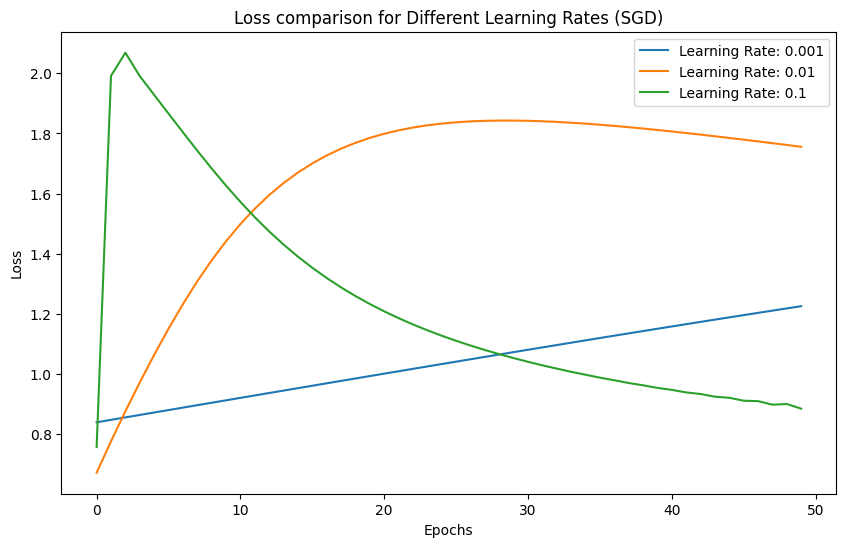

In [69]:
def compare_learning_rates(X_train, y_train, hidden_size, epochs=50, learning_rates=[0.001, 0.01, 0.1]):
    """
    Compare the performance of SGD with different learning rates.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rates: List of learning rates to test.
    """
    plt.figure(figsize=(10, 6))

    for lr in learning_rates:
        print(f"Training with learning rate: {lr}")
        loss_history = train_model_with_sgd(X_train, y_train, hidden_size, epochs, lr)
        plt.plot(loss_history, label=f"Learning Rate: {lr}")
        print()

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss comparison for Different Learning Rates (SGD)")
    plt.legend()
    plt.show()

# compare_learning_rates(x_train, y_train, hidden_size=32)
compare_learning_rates(x_train, y_train, hidden_size=64)  # you can choose 32 or 128 too
# compare_learning_rates(x_train, y_train, hidden_size=128)

### SGD with Momentum vs. Classic SGD


TODO: Compare Stochastic Gradient Descent (SGD) with momentum and classic SGD, you can set up an experiment that trains the same model using both methods. This will help you observe differences in convergence speed and stability.

Steps for Implementing the Comparison:

1. Implement Classic SGD: Ensure you have a basic SGD implementation.(already implemented in the previous cells)

2. Implement SGD with Momentum: Add a momentum version of the SGD optimizer.

3. Modify the Training Loop: Allow for both optimizers in the training process.

4. Train the Model: Run the training process using both optimizers.

5. Visualize the Results: Plot the loss curves for each optimizer to compare their performance.

2. Implement SGD with Momentum


In [64]:
def initialize_momentum(parameters):
    """
    Initialize the momentum variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: Momentum variable (initialized to zeros).
    """
    v = {key: np.zeros_like(value) for key, value in parameters.items()}
    return v

def update_parameters_with_momentum(parameters, gradients, v, learning_rate=0.01, beta=0.9):
    """
    Update parameters using SGD with momentum.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: Momentum variable.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for momentum.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated momentum variable.
    """

    for key in parameters:
        v[key] = beta * v[key] + (1 - beta) * gradients['d' + key]
        parameters[key] -= learning_rate * v[key]

    return parameters, v


3. Modify the Training Loop


In [65]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, optimizer='sgd'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('sgd' or 'momentum').

    Returns:
    - loss_history: List of loss values over epochs.
    """

    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    if optimizer == 'momentum':
        v = initialize_momentum(parameters)

    loss_history = []

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, A2)
        gradients = backward_propagation(X_train, y_train, parameters, cache)

        if optimizer == 'momentum':
            parameters, v = update_parameters_with_momentum(parameters, gradients, v, learning_rate)
        else:  # SGD
            parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)

        loss_history.append(loss)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{epochs} - Loss ({optimizer}): {loss:.4f}")

    return loss_history

4. Train the Model with Both Optimizers


Training with Classic SGD...
Epoch 0/50 - Loss (sgd): 0.8389
Epoch 10/50 - Loss (sgd): 1.7004
Epoch 20/50 - Loss (sgd): 1.9505
Epoch 30/50 - Loss (sgd): 1.9608
Epoch 40/50 - Loss (sgd): 1.9066

Training with SGD with Momentum...
Epoch 0/50 - Loss (momentum): 0.7491
Epoch 10/50 - Loss (momentum): 1.0116
Epoch 20/50 - Loss (momentum): 1.6597
Epoch 30/50 - Loss (momentum): 2.2395
Epoch 40/50 - Loss (momentum): 2.3068



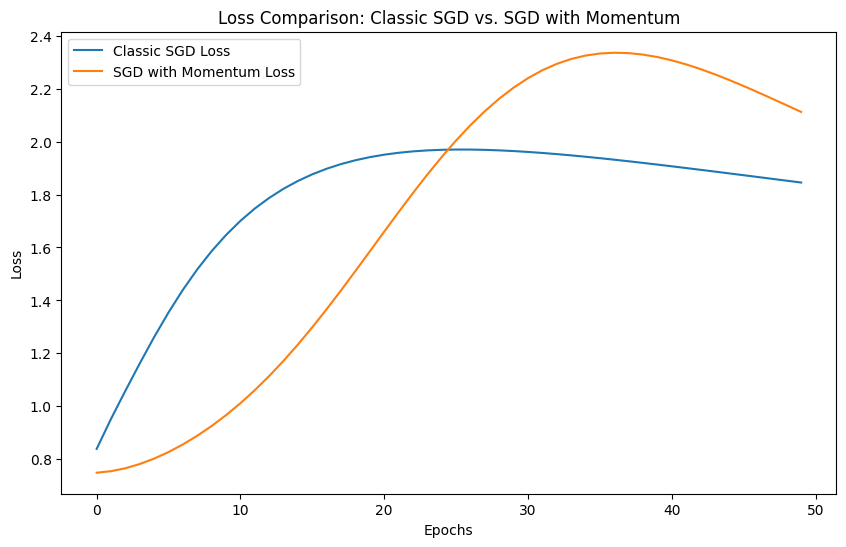

In [66]:
def compare_sgd_and_momentum(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the performance of classic SGD and SGD with momentum.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """
    print("Training with Classic SGD...")
    loss_sgd = train_model(X_train, y_train, hidden_size, epochs, optimizer='sgd')
    print()

    print("Training with SGD with Momentum...")
    loss_momentum = train_model(X_train, y_train, hidden_size, epochs, optimizer='momentum')
    print()

    plt.figure(figsize=(10, 6))
    plt.plot(loss_sgd, label="Classic SGD Loss")
    plt.plot(loss_momentum, label="SGD with Momentum Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss Comparison: Classic SGD vs. SGD with Momentum")
    plt.legend()
    plt.show()

# compare_sgd_and_momentum(x_train, y_train, hidden_size=32, epochs=50)
compare_sgd_and_momentum(x_train, y_train, hidden_size=64, epochs=50)
# compare_sgd_and_momentum(x_train, y_train, hidden_size=128, epochs=50)

## Mini-Batch Gradient Descent

### Mini-Batch Size Optimization

TODO: Investigate how different mini-batch sizes affect model performance, you can set up an experiment where you train the same model using various mini-batch sizes.

Steps for Implementing the Mini-Batch Size Experiment

1. Modify the Training Loop: Update the training loop to use mini-batches.
2. Train the Model: Run the training process with a set of predefined mini-batch sizes.
3. Evaluate Performance: Track training time and accuracy for each mini-batch size.
4. Print the training losses and accuracies for comparison.

1. Modify the Training Loop for Mini-Batches


In [52]:
def compute_accuracy(y_true, y_pred):
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_true, axis=1)
    accuracy = np.mean(y_pred_labels == y_true_labels)
    return accuracy

def train_model_with_mini_batches(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, batch_size=32):
    """
    Train the neural network model using mini-batches.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - batch_size: Size of mini-batches.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []
    accuracy_history = []

    for epoch in range(epochs):
        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train[i:i+batch_size]
            y_batch = y_train[i:i+batch_size]
            A2, cache = forward_propagation(X_batch, parameters)
            loss = compute_loss(y_batch, A2)
            gradients = backward_propagation(X_batch, y_batch, parameters, cache)
            parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)

        A2, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, A2)
        loss_history.append(loss)
        accuracy = compute_accuracy(y_train, A2)
        accuracy_history.append(accuracy)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{epochs} - Loss: {loss:.4f} - Accuracy: {accuracy:.4f}")

    return loss_history, accuracy_history


2. Train the Model with Different Mini-Batch Sizes


Training with mini-batch size: 16
Epoch 0/50 - Loss: 0.5724 - Accuracy: 0.8067
Epoch 10/50 - Loss: 0.3706 - Accuracy: 0.8760
Epoch 20/50 - Loss: 0.3426 - Accuracy: 0.8890
Epoch 30/50 - Loss: 0.3234 - Accuracy: 0.8970
Epoch 40/50 - Loss: 0.3055 - Accuracy: 0.9035
Final Loss for batch size 16: 0.2942
Final Accuracy for batch size 16: 0.9076

Training with mini-batch size: 32
Epoch 0/50 - Loss: 0.6767 - Accuracy: 0.7654
Epoch 10/50 - Loss: 0.4158 - Accuracy: 0.8616
Epoch 20/50 - Loss: 0.3752 - Accuracy: 0.8767
Epoch 30/50 - Loss: 0.3498 - Accuracy: 0.8843
Epoch 40/50 - Loss: 0.3324 - Accuracy: 0.8901
Final Loss for batch size 32: 0.3201
Final Accuracy for batch size 32: 0.8943

Training with mini-batch size: 64
Epoch 0/50 - Loss: 0.8241 - Accuracy: 0.6989
Epoch 10/50 - Loss: 0.4606 - Accuracy: 0.8459
Epoch 20/50 - Loss: 0.4073 - Accuracy: 0.8631
Epoch 30/50 - Loss: 0.3806 - Accuracy: 0.8725
Epoch 40/50 - Loss: 0.3626 - Accuracy: 0.8786
Final Loss for batch size 64: 0.3491
Final Accuracy f

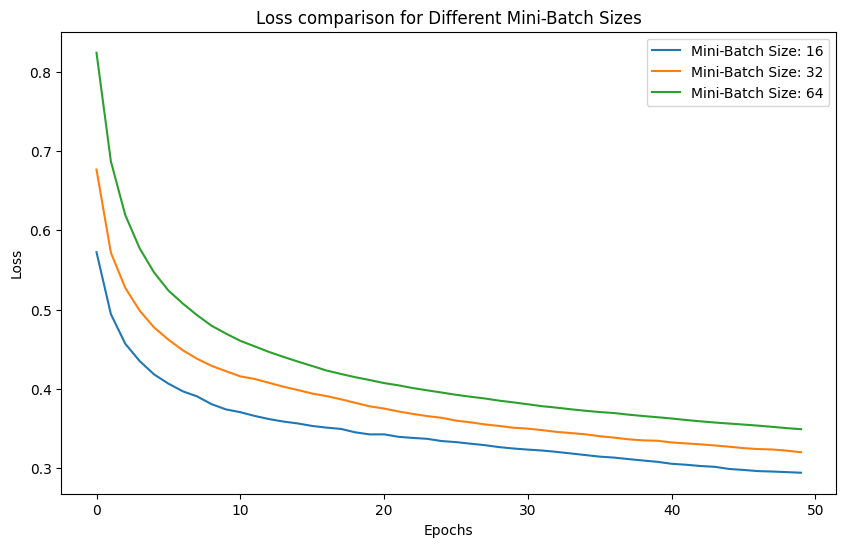

In [53]:
def compare_mini_batch_sizes(X_train, y_train, hidden_size, epochs=50, batch_sizes=[16, 32, 64]):
    """
    Compare the performance of different mini-batch sizes and print results.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_sizes: List of mini-batch sizes to test.
    """
    plt.figure(figsize=(10, 6))

    for batch_size in batch_sizes:
        print(f"Training with mini-batch size: {batch_size}")
        loss_history, accuracy_history = train_model_with_mini_batches(X_train, y_train, hidden_size, epochs, batch_size=batch_size)
        print(f"Final Loss for batch size {batch_size}: {loss_history[-1]:.4f}")
        print(f"Final Accuracy for batch size {batch_size}: {accuracy_history[-1]:.4f}")
        print()
        plt.plot(loss_history, label=f"Mini-Batch Size: {batch_size}")

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss comparison for Different Mini-Batch Sizes")
    plt.legend()

compare_mini_batch_sizes(x_train, y_train, hidden_size=32) # we can use 64 or 128 too
# compare_mini_batch_sizes(x_train, y_train, hidden_size=64)
# compare_mini_batch_sizes(x_train, y_train, hidden_size=128)

### Mini-Batch vs. Full-Batch Gradient Descent


TODO: Compare the efficiency and performance of mini-batch gradient descent against full-batch gradient descent.

1. Implement Full-Batch Gradient Descent: Ensure you have a full-batch gradient descent implementation.

2. Modify the Training Loop: Allow the training loop to handle both mini-batch and full-batch scenarios.

3. Train the Model: Run the training process using both methods and track their performance.

4. Print Results: Display the final loss and accuracy for both methods along with training times.

In [54]:
def train_model_full_batch(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []
    accuracy_history = []

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, A2)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters = update_parameters(parameters, gradients, learning_rate)

        loss_history.append(loss)
        accuracy_history.append(compute_accuracy(y_train, A2))
        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{epochs} - Loss: {loss:.4f} - Accuracy: {accuracy_history[-1]:.4f}")

    return loss_history, accuracy_history


Training with Mini-Batch Gradient Descent...
Epoch 0/50 - Loss: 0.6803 - Accuracy: 0.7779
Epoch 10/50 - Loss: 0.4235 - Accuracy: 0.8625
Epoch 20/50 - Loss: 0.3759 - Accuracy: 0.8759
Epoch 30/50 - Loss: 0.3504 - Accuracy: 0.8837
Epoch 40/50 - Loss: 0.3334 - Accuracy: 0.8894

Training with Full-Batch Gradient Descent...
Epoch 0/50 - Loss: 0.7560 - Accuracy: 0.0270
Epoch 10/50 - Loss: 1.3333 - Accuracy: 0.0547
Epoch 20/50 - Loss: 1.8525 - Accuracy: 0.1173
Epoch 30/50 - Loss: 2.0323 - Accuracy: 0.1704
Epoch 40/50 - Loss: 2.0651 - Accuracy: 0.2054

Mini-Batch Final Loss: 0.3208, Final Accuracy: 0.8928, Time: 66.3551 seconds
Full-Batch Final Loss: 2.0531, Final Accuracy: 0.2332, Time: 26.2729 seconds



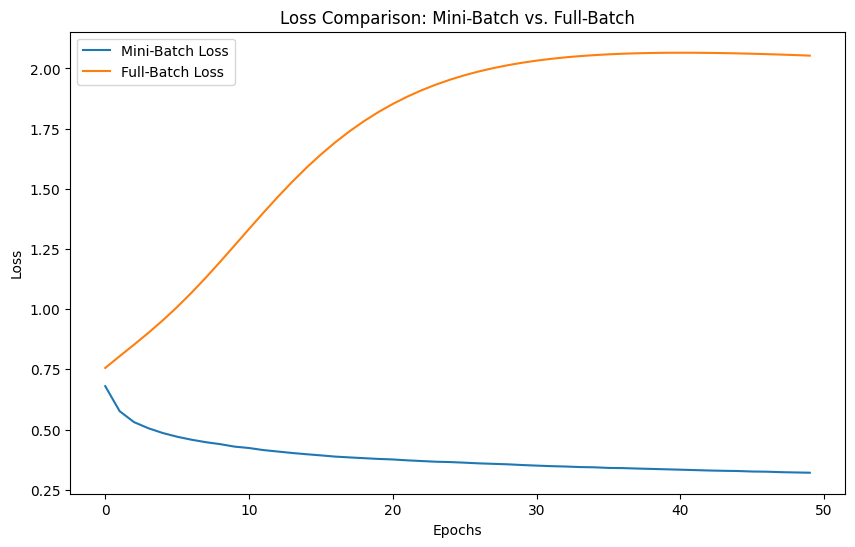

In [56]:
import time

def compare_mini_batch_and_full_batch(X_train, y_train, hidden_size, epochs=50, batch_size=32):
    """
    Compare the performance of mini-batch gradient descent against full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_size: Size of mini-batches for mini-batch gradient descent.
    """
    print("Training with Mini-Batch Gradient Descent...")
    start_time = time.time()
    loss_history_mini_batch, accuracy_history_mini_batch = train_model_with_mini_batches(X_train, y_train, hidden_size, epochs, batch_size=batch_size)
    end_time = time.time()
    mini_batch_time = end_time - start_time
    print()

    print("Training with Full-Batch Gradient Descent...")
    start_time = time.time()
    loss_history_full_batch, accuracy_history_full_batch = train_model_full_batch(X_train, y_train, hidden_size, epochs)
    end_time = time.time()
    full_batch_time = end_time - start_time
    print()

    print(f"Mini-Batch Final Loss: {loss_history_mini_batch[-1]:.4f}, Final Accuracy: {accuracy_history_mini_batch[-1]:.4f}, Time: {mini_batch_time:.4f} seconds")
    print(f"Full-Batch Final Loss: {loss_history_full_batch[-1]:.4f}, Final Accuracy: {accuracy_history_full_batch[-1]:.4f}, Time: {full_batch_time:.4f} seconds")
    print()

    plt.figure(figsize=(10, 6))
    plt.plot(loss_history_mini_batch, label="Mini-Batch Loss")
    plt.plot(loss_history_full_batch, label="Full-Batch Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss Comparison: Mini-Batch vs. Full-Batch")
    plt.legend()
    plt.show()

compare_mini_batch_and_full_batch(x_train, y_train, hidden_size=32) # you can use 64 or 128
# compare_mini_batch_and_full_batch(x_train, y_train, hidden_size=64)
# compare_mini_batch_and_full_batch(x_train, y_train, hidden_size=128)